In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import euclidean_distances
from sklearn.random_projection import GaussianRandomProjection
from sklearn.cluster import FeatureAgglomeration
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import  MinMaxScaler


In [57]:
data = pd.read_csv("abalone.data",sep=",")
print(data)

     Sex  Length  Diameter  ...  Viscera Weight  Shell Weight  Rings
0      M   0.455     0.365  ...          0.1010        0.1500     15
1      M   0.350     0.265  ...          0.0485        0.0700      7
2      F   0.530     0.420  ...          0.1415        0.2100      9
3      M   0.440     0.365  ...          0.1140        0.1550     10
4      I   0.330     0.255  ...          0.0395        0.0550      7
...   ..     ...       ...  ...             ...           ...    ...
4172   F   0.565     0.450  ...          0.2390        0.2490     11
4173   M   0.590     0.440  ...          0.2145        0.2605     10
4174   M   0.600     0.475  ...          0.2875        0.3080      9
4175   F   0.625     0.485  ...          0.2610        0.2960     10
4176   M   0.710     0.555  ...          0.3765        0.4950     12

[4177 rows x 9 columns]


9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64
9.0


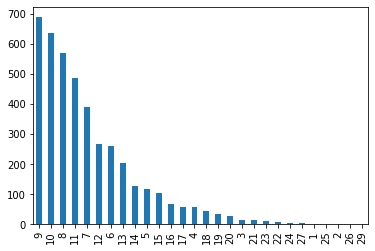

In [58]:


data = data.sort_values(by='Rings',axis=0)
#print(data)
print(data['Rings'].value_counts())
print(data['Rings'].median())
data['Rings'].value_counts().plot(kind='bar')
data = data.drop(columns="Sex")

y = data.iloc[:,7].to_numpy()
y=np.where(y<10,0,1)



x = data.iloc[:,:7].to_numpy()
datatest = MinMaxScaler().fit_transform(x)
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=7/10, random_state=42)
scaler = StandardScaler()
x = scaler.fit_transform(x)


#y_train = np.where(y_train>=7,1,0)
#y_test = np.where(y_test>=7,1,0)

In [59]:
print(pd.DataFrame(y).value_counts())

0    2096
1    2081
dtype: int64


K-means
For validation, tried checking the number of "classes" that were assigned to actual labels, does not seem to be any successful performance on any individual level.

In [48]:
def kmeans(data,comps,distort = False):
  km = KMeans(n_clusters=comps, init='random',n_init=100, max_iter=500, tol=1e-04, random_state=0)
  print(data)
  y_km = km.fit_predict(data)
  if distort:
    distortions = []
    for i in range(1, 11):
      km = KMeans(
          n_clusters=i, init='random',
          n_init=10, max_iter=600,
          tol=1e-04, random_state=0
      )
      km.fit(data)
      
      
      distortions.append(km.inertia_)

  # plot
    plt.plot(range(1, 11), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()
  return (y_km)
  

[[0.         0.         0.00884956 ... 0.         0.         0.        ]
 [0.10135135 0.07563025 0.02212389 ... 0.00235373 0.00460829 0.00348779]
 [0.18243243 0.15966387 0.04424779 ... 0.00975118 0.01053325 0.00847035]
 ...
 [0.7972973  0.80672269 0.19911504 ... 0.50605245 0.51415405 0.88041854]
 [0.64189189 0.68907563 0.15929204 ... 0.21755212 0.26925609 0.52167414]
 [0.84459459 0.8907563  0.16371681 ... 0.4737727  0.42264648 0.47184853]]


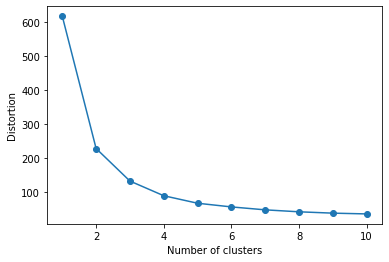

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [61]:
kmeans(datatest,3,distort=True)

[[-3.73915367 -3.55626742 -3.09684487 ... -1.61473073 -1.64317294
  -1.7051345 ]
 [-3.11456245 -3.10276633 -2.73818239 ... -1.59896044 -1.61123896
  -1.67998829]
 [-2.61488947 -2.59887623 -2.14041159 ... -1.54939669 -1.57018099
  -1.64406514]
 ...
 [ 1.1742973   1.28107755  2.04398402 ...  1.77588062  1.91974659
   4.64248642]
 [ 0.21659075  0.57563141  0.96799658 ... -0.15710578  0.22268377
   2.05601949]
 [ 1.4657732   1.78496765  1.08755074 ...  1.55960242  1.28562903
   1.69678798]]


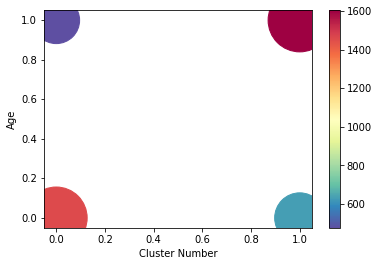

In [62]:
colorweightedScatter(kmeans(x,2),y)

In [51]:

#from: https://stackoverflow.com/questions/32687826/how-can-i-account-for-identical-data-points-in-a-scatter-plot/32691209
def colorweightedScatter(xvals,y):
  
  points=list(set(zip(xvals,y))) 
  #Generate a list of point counts
  count=[len([x for x,y in zip(xvals,y) if x==p[0] and y==p[1]]) for p in points]
  #Now for the plotting:
  plot_x=[i[0] for i in points]
  plot_y=[i[1] for i in points]
  count=np.array(count)
  plt.scatter(plot_x,plot_y,c=count,s=100*count**0.5,cmap='Spectral_r')
  plt.colorbar()
  plt.ylabel("Age")
  plt.xlabel("Cluster Number")
  plt.show()

Expectation Maximization


In [52]:
def expMax(data,comps):
  gauss = GaussianMixture(n_components=comps,random_state=0)
  
  y_gauss = gauss.fit_predict(data)
  
  return(y_gauss)

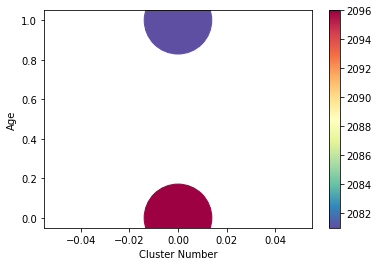

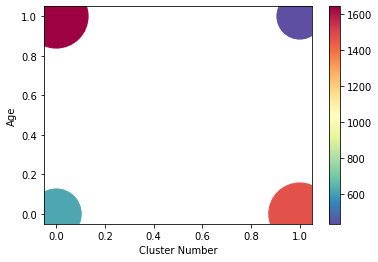

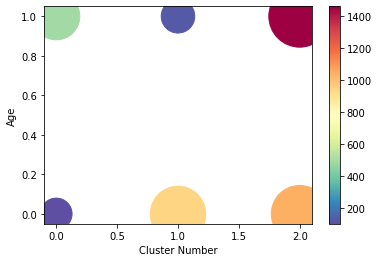

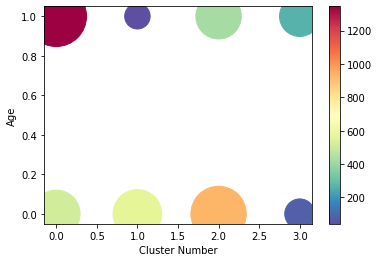

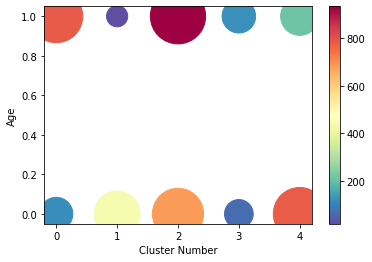

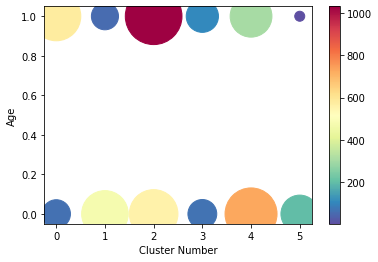

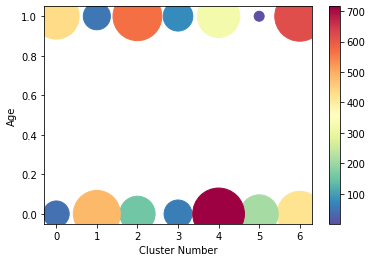

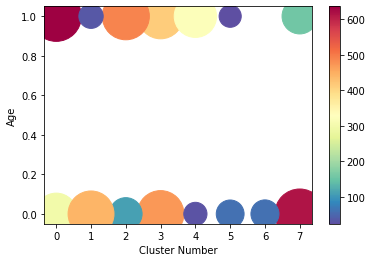

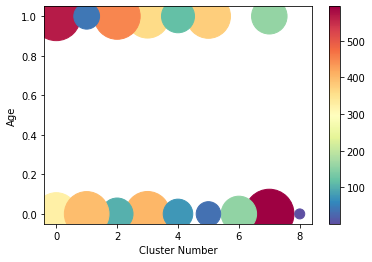

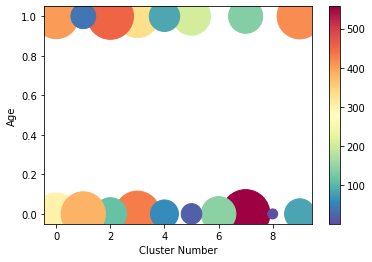

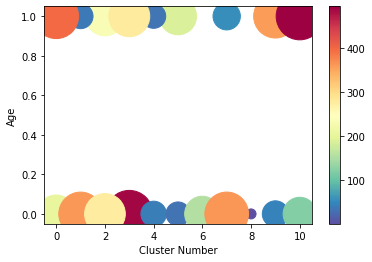

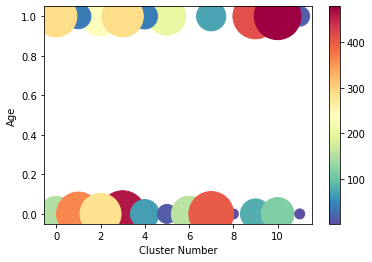

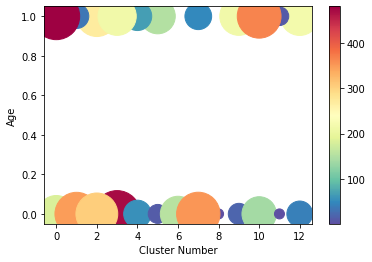

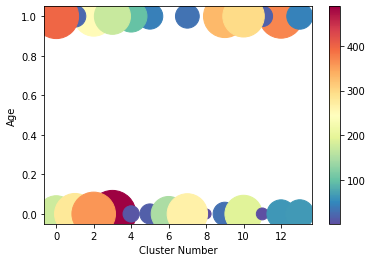

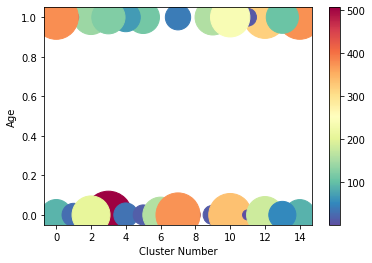

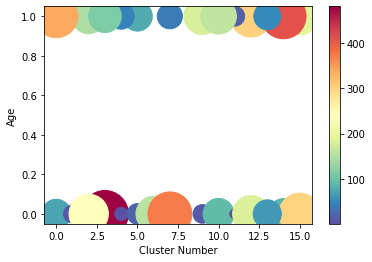

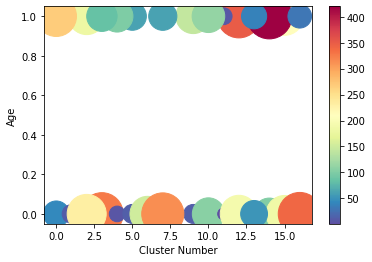

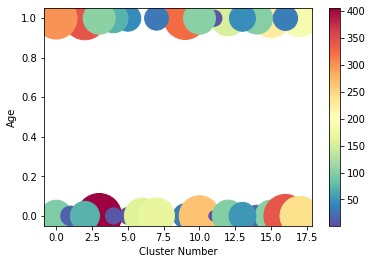

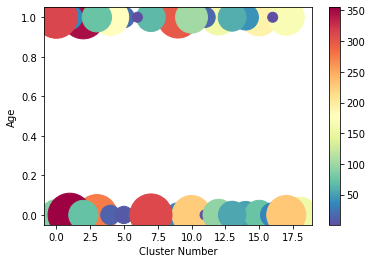

In [53]:
for i in range(1,20):
  
  colorweightedScatter(expMax(x,i),y)
  

PCA
PCA attempts to project multiple dimensions into lower dimension space. The explained variance ratio gives the percentage representation of the resulting dimensions.

In [66]:
def pc_a(data,comps):
  num = comps
  pca = PCA(n_components=num)
 
  # fit and transform data
  X_train_pca = pca.fit_transform(data)
  print(pca.explained_variance_ratio_)
  
  data = pd.DataFrame(X_train_pca)
  return data
  

In [ ]:

for i in range (1,8):
  colorweightedScatter(kmeans(pc_a(datatest,i),comps=2),y)

[0.93679718 0.03153659 0.01626195]


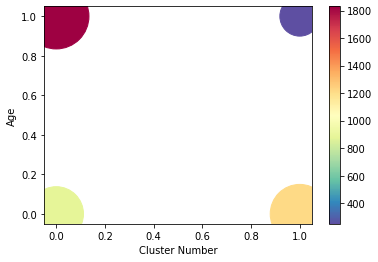

In [79]:
colorweightedScatter(expMax(pc_a(datatest,3),comps=2),y)

ICA

In [70]:
def ica(data, comps):
  ica = FastICA(n_components=comps)
  S_ = ica.fit_transform(data)
  new = pd.DataFrame(S_)
  print(new)
  print(new.kurtosis(axis=0).mean())
  return new

In [71]:
for i in range(1,7):
  ica(datatest,i)

             0
0     0.038382
1     0.034943
2     0.031483
3     0.031290
4     0.033874
...        ...
4172 -0.015195
4173 -0.008626
4174 -0.034686
4175 -0.009407
4176 -0.026397

[4177 rows x 1 columns]
-0.41902436838343693
             0         1
0     0.086073  0.028638
1     0.068399  0.016640
2     0.052280  0.006144
3     0.051632  0.005796
4     0.063037  0.013036
...        ...       ...
4172 -0.014673  0.007033
4173 -0.019815 -0.006882
4174  0.011255  0.058424
4175 -0.004936  0.008281
4176 -0.017522  0.019761

[4177 rows x 2 columns]
3.3375865480874842
             0         1         2
0    -0.015056  0.087958  0.023791
1    -0.008072  0.069565  0.013810
2    -0.001985  0.052815  0.005079
3    -0.002385  0.052228  0.004573
4    -0.005896  0.063976  0.010841
...        ...       ...       ...
4172 -0.056327 -0.007252 -0.012728
4173 -0.025424 -0.016244 -0.016255
4174 -0.123356  0.026441  0.017270
4175 -0.075170  0.005135 -0.018368
4176 -0.016357 -0.016084  0.015335

[4177 row

In [ ]:
colorweightedScatter(kmeans(ica(datatest,2),comps=2),y)

             0         1
0     0.086030 -0.028766
1     0.068374 -0.016742
2     0.052271 -0.006221
3     0.051624 -0.005872
4     0.063018 -0.013130
...        ...       ...
4172 -0.014683 -0.007012
4173 -0.019805  0.006911
4174  0.011169 -0.058441
4175 -0.004949 -0.008274
4176 -0.017551 -0.019735

[4177 rows x 2 columns]
3.337849763484485


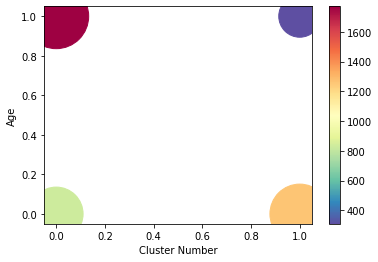

In [80]:
colorweightedScatter(expMax(ica(datatest,2),comps=2),y)

Randomized Projections

In [74]:
def randomizedProj(data, comps):
  gauss_proj = GaussianRandomProjection(n_components=comps,random_state=0)
  gauss_proj.fit(data)
  vector_t = gauss_proj.transform(data)
  newData = pd.DataFrame(vector_t)
  return newData

             0
0     0.008661
1     0.244230
2     0.473951
3     0.493281
4     0.304781
...        ...
4172  3.674319
4173  3.144843
4174  4.934623
4175  3.163487
4176  4.359590

[4177 rows x 1 columns]


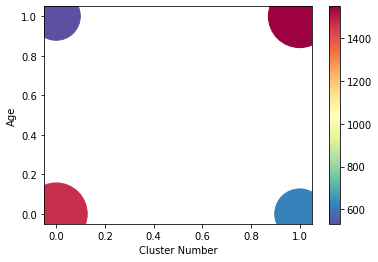

             0         1
0     0.006125  0.002569
1     0.172697 -0.004274
2     0.335134 -0.000590
3     0.348802  0.000284
4     0.215513 -0.004941
...        ...       ...
4172  2.598136  0.469486
4173  2.223740  0.389427
4174  3.489305  0.865114
4175  2.236923  0.384417
4176  3.082695  0.712488

[4177 rows x 2 columns]


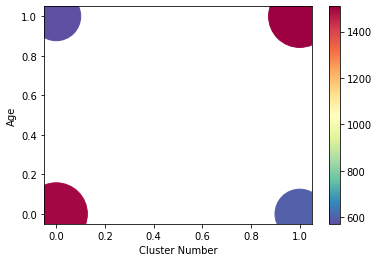

             0         1         2
0     0.005001  0.002098  0.007634
1     0.141006 -0.003490  0.052094
2     0.273636 -0.000482  0.098230
3     0.284796  0.000232  0.099616
4     0.175965 -0.004034  0.066963
...        ...       ...       ...
4172  2.121369  0.383334 -0.399748
4173  1.815676  0.317966 -0.196238
4174  2.849006  0.706363 -1.019803
4175  1.826440  0.313876 -0.478515
4176  2.517010  0.581744 -0.364746

[4177 rows x 3 columns]


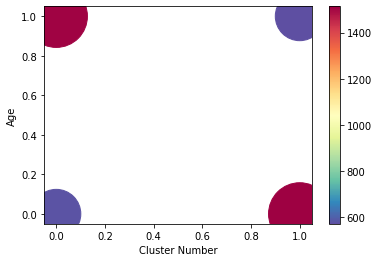

             0         1         2         3
0     0.004331  0.001817  0.006611 -0.003284
1     0.122115 -0.003023  0.045114  0.060894
2     0.236976 -0.000417  0.085070  0.119239
3     0.246640  0.000201  0.086270  0.120836
4     0.152391 -0.003494  0.057991  0.081825
...        ...       ...       ...       ...
4172  1.837159  0.331977 -0.346192  0.812804
4173  1.572422  0.275366 -0.169947  0.695269
4174  2.467311  0.611728 -0.883175  0.973559
4175  1.581744  0.271824 -0.414406  0.734181
4176  2.179795  0.503805 -0.315879  0.946962

[4177 rows x 4 columns]


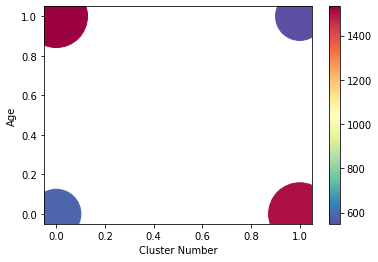

             0         1         2         3         4
0     0.003873  0.001625  0.005913 -0.002937  0.000613
1     0.109223 -0.002703  0.040352  0.054465  0.115925
2     0.211957 -0.000373  0.076089  0.106650  0.220704
3     0.220602  0.000180  0.077163  0.108079  0.224954
4     0.136302 -0.003125  0.051869  0.073187  0.150770
...        ...       ...       ...       ...       ...
4172  1.643205  0.296929 -0.309644  0.726994  0.647320
4173  1.406417  0.246295 -0.152006  0.621868  0.666241
4174  2.206830  0.547146 -0.789936  0.870777  0.427745
4175  1.414755  0.243127 -0.370656  0.656671  0.570291
4176  1.949668  0.450617 -0.282531  0.846988  0.647859

[4177 rows x 5 columns]


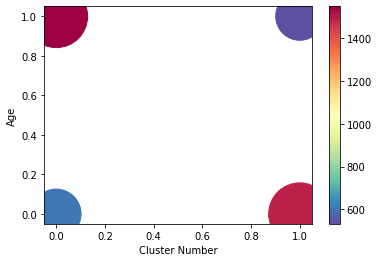

             0         1         2         3         4         5
0     0.003536  0.001483  0.005398 -0.002681  0.000560  0.004344
1     0.099706 -0.002468  0.036836  0.049720  0.105824  0.050302
2     0.193490 -0.000341  0.069459  0.097358  0.201474  0.100891
3     0.201381  0.000164  0.070439  0.098662  0.205354  0.101670
4     0.124426 -0.002853  0.047350  0.066810  0.137633  0.069516
...        ...       ...       ...       ...       ...       ...
4172  1.500034  0.271058 -0.282665  0.663652  0.590920 -0.026446
4173  1.283877  0.224836 -0.138761  0.567685  0.608192  0.087939
4174  2.014551  0.499474 -0.721110  0.794907  0.390476 -0.361297
4175  1.291488  0.221944 -0.338361  0.599456  0.520602 -0.047066
4176  1.779795  0.411355 -0.257914  0.773191  0.591411 -0.032379

[4177 rows x 6 columns]


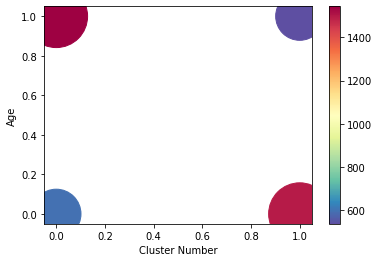

             0         1         2         3         4         5         6
0     0.003274  0.001373  0.004997 -0.002482  0.000518  0.004022 -0.001705
1     0.092310 -0.002285  0.034103  0.046032  0.097974  0.046571 -0.016510
2     0.179137 -0.000316  0.064307  0.090136  0.186529  0.093407 -0.017281
3     0.186443  0.000152  0.065214  0.091344  0.190121  0.094128 -0.023805
4     0.115196 -0.002641  0.043837  0.061854  0.127423  0.064359 -0.006442
...        ...       ...       ...       ...       ...       ...       ...
4172  1.388762  0.250951 -0.261697  0.614422  0.547086 -0.024484 -0.433065
4173  1.188639  0.208157 -0.128468  0.525574  0.563076  0.081415 -0.283106
4174  1.865112  0.462423 -0.667618  0.735941  0.361510 -0.334496 -0.711235
4175  1.195686  0.205480 -0.313262  0.554988  0.481984 -0.043574 -0.349669
4176  1.647770  0.380841 -0.238782  0.715836  0.547540 -0.029977 -0.413289

[4177 rows x 7 columns]


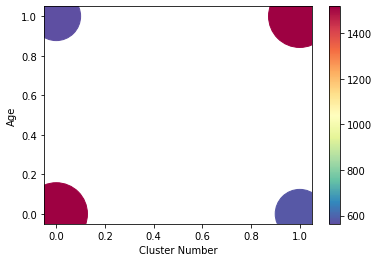

/usr/local/lib/python3.7/dist-packages/sklearn/random_projection.py:390: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (7 < 8).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)


             0         1         2  ...         5         6         7
0     0.003062  0.001285  0.004675  ...  0.003762 -0.001595  0.001211
1     0.086348 -0.002137  0.031901  ...  0.043563 -0.015444 -0.029873
2     0.167567 -0.000295  0.060154  ...  0.087374 -0.016165 -0.063445
3     0.174401  0.000142  0.061002  ...  0.088048 -0.022267 -0.062997
4     0.107756 -0.002470  0.041006  ...  0.060202 -0.006026 -0.042565
...        ...       ...       ...  ...       ...       ...       ...
4172  1.299068  0.234743 -0.244795  ... -0.022903 -0.405096 -0.398868
4173  1.111870  0.194713 -0.120171  ...  0.076157 -0.264822 -0.385023
4174  1.744653  0.432557 -0.624499  ... -0.312893 -0.665300 -0.510698
4175  1.118462  0.192209 -0.293030  ... -0.040760 -0.327086 -0.336566
4176  1.541348  0.356244 -0.223360  ... -0.028041 -0.386597 -0.569140

[4177 rows x 8 columns]


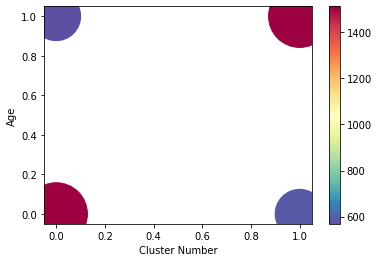

/usr/local/lib/python3.7/dist-packages/sklearn/random_projection.py:390: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (7 < 9).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)


             0         1         2  ...         6         7         8
0     0.002887  0.001211  0.004407  ... -0.001503  0.001141 -0.001871
1     0.081410 -0.002015  0.030076  ... -0.014561 -0.028164  0.002613
2     0.157984 -0.000278  0.056713  ... -0.015241 -0.059816  0.003480
3     0.164427  0.000134  0.057514  ... -0.020994 -0.059394  0.001908
4     0.101594 -0.002329  0.038661  ... -0.005681 -0.040130  0.004703
...        ...       ...       ...  ...       ...       ...       ...
4172  1.224773  0.221318 -0.230795  ... -0.381928 -0.376057 -0.247032
4173  1.048281  0.183578 -0.113298  ... -0.249676 -0.363003 -0.179920
4174  1.644874  0.407819 -0.588783  ... -0.627250 -0.481491 -0.450198
4175  1.054496  0.181216 -0.276271  ... -0.308379 -0.317317 -0.224247
4176  1.453197  0.335870 -0.210586  ... -0.364487 -0.536590 -0.288145

[4177 rows x 9 columns]


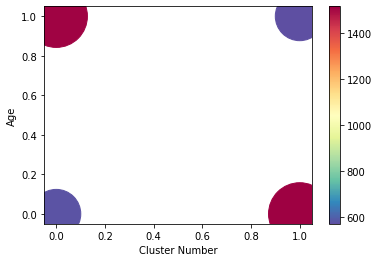

In [75]:
for i in range(1,10):
  colorweightedScatter(kmeans(randomizedProj(datatest,i),comps=2),y)

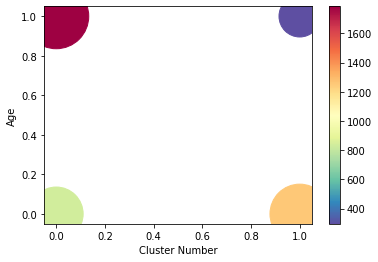

In [81]:
colorweightedScatter(expMax(randomizedProj(datatest,3),comps=2),y)

Feature Agglomeration

**bold text**

In [77]:
def featAgglom(data,answers,clus):
  agglo=FeatureAgglomeration(n_clusters=clus).fit_transform(data)
  if clus == 2:
    color = []
    for i in answers:
      if i==3:
          color.append('g')
      if  i==4:
          color.append('b')
      if i==5:
          color.append('r')
      if i==6:
          color.append('y')
      if i==7:
          color.append('Purple')
      if i==8:
          color.append('Orange')
      if i==9:
          color.append('Black')
    plt.scatter(agglo[:,0],agglo[:,1],c=color)
    plt.show()
  return agglo

[[0.00126422]
 [0.03059422]
 [0.06114658]
 ...
 [0.63948324]
 [0.4182093 ]
 [0.55811286]]


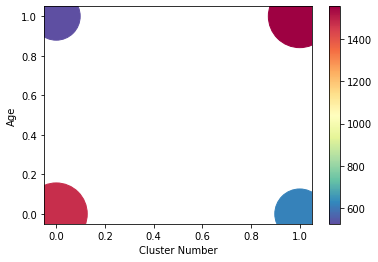

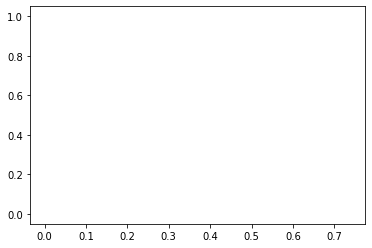

[[0.00176991 0.        ]
 [0.00743559 0.0884908 ]
 [0.01718596 0.17104815]
 ...
 [0.57447254 0.80200999]
 [0.31929952 0.66548376]
 [0.43428782 0.86767545]]


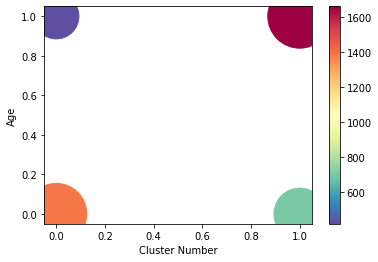

[[0.         0.         0.00884956]
 [0.00376351 0.0884908  0.02212389]
 [0.0104205  0.17104815 0.04424779]
 ...
 [0.66831192 0.80200999 0.19911504]
 [0.35930139 0.66548376 0.15929204]
 [0.50193057 0.86767545 0.16371681]]


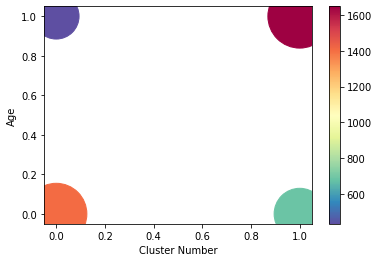

[[0.         0.         0.00884956 0.        ]
 [0.00348327 0.0884908  0.02212389 0.00460421]
 [0.00958493 0.17104815 0.04424779 0.01292722]
 ...
 [0.63354168 0.80200999 0.19911504 0.77262263]
 [0.33616078 0.66548376 0.15929204 0.42872322]
 [0.45608923 0.86767545 0.16371681 0.63945458]]


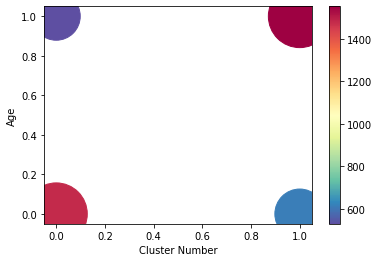

[[0.         0.         0.00884956 0.         0.        ]
 [0.00348101 0.0884908  0.02212389 0.00460421 0.00348779]
 [0.01014221 0.17104815 0.04424779 0.01292722 0.00847035]
 ...
 [0.51010325 0.80200999 0.19911504 0.77262263 0.88041854]
 [0.2434041  0.66548376 0.15929204 0.42872322 0.52167414]
 [0.44820959 0.86767545 0.16371681 0.63945458 0.47184853]]


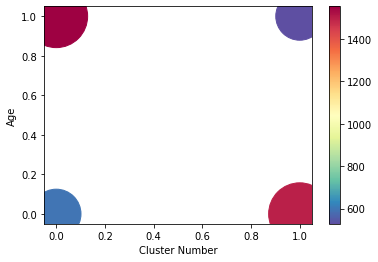

[[0.         0.         0.         0.         0.         0.00884956]
 [0.0884908  0.00348779 0.00235373 0.00460421 0.00460829 0.02212389]
 [0.17104815 0.00847035 0.00975118 0.01292722 0.01053325 0.04424779]
 ...
 [0.80200999 0.88041854 0.50605245 0.77262263 0.51415405 0.19911504]
 [0.66548376 0.52167414 0.21755212 0.42872322 0.26925609 0.15929204]
 [0.86767545 0.47184853 0.4737727  0.63945458 0.42264648 0.16371681]]


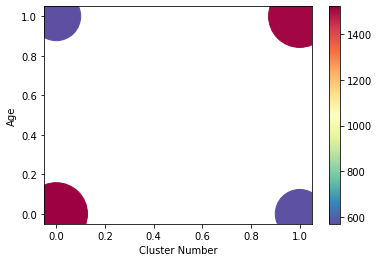

[[0.         0.         0.         ... 0.         0.00884956 0.        ]
 [0.00348779 0.00460829 0.00235373 ... 0.07563025 0.02212389 0.10135135]
 [0.00847035 0.01053325 0.00975118 ... 0.15966387 0.04424779 0.18243243]
 ...
 [0.88041854 0.51415405 0.50605245 ... 0.80672269 0.19911504 0.7972973 ]
 [0.52167414 0.26925609 0.21755212 ... 0.68907563 0.15929204 0.64189189]
 [0.47184853 0.42264648 0.4737727  ... 0.8907563  0.16371681 0.84459459]]


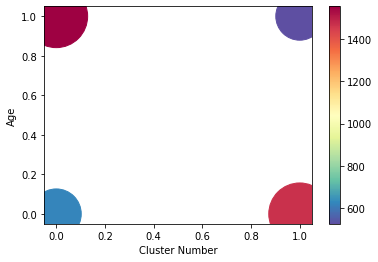

In [78]:
for i in range(1,8):
  colorweightedScatter(kmeans(featAgglom(datatest,y,i),comps=2),y)

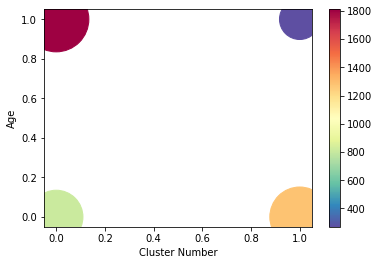

In [82]:
colorweightedScatter(expMax(featAgglom(datatest,y,i),comps=2),y)

NN


In [ ]:
def NNcreator(data,ytrue):
  
  x, X_test,y, y_test = train_test_split(data, ytrue, test_size=7/10, random_state=42)
 
  clf = MLPClassifier(solver='lbfgs', alpha=.001,hidden_layer_sizes=9, random_state=1,max_iter=5000)
  clf.fit(x, y)
  
  predicts = clf.predict(X_test)
  
  print(metrics.accuracy_score(y_test,predicts))

In [ ]:
NNcreator(featAgglom(x,y,5),y)
NNcreator(randomizedProj(x),y)

0.5333916593759114
0.48556430446194226
